# AI Tools Lab

# AIX360 vs InterpretML
## using LIME for Breast Cancer Classification

### by Amine Ben Ayed & Philipp Scholl, Goethe-Universität Frankfurt, Summer Semester 2020

### Code for model training adapted from: https://github.com/Elhamkesh/Breast-Cancer-Scikitlearn

In [62]:
########################
# Breast Cancer Dataset
# use Breast Cancer Wisconsin (Diagnostic) Database 
#######################
# what we apply in this project:
# KNN
# Logistic Regression
# Decision Tree
# Random Forests
# Neural Network
# SVM
#########################

In [63]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
#import graphviz
%matplotlib inline

## Exploring the data

In [64]:
#load the breast cancer data and few EDA
cancer = load_breast_cancer()
cancer_df = load_breast_cancer(as_frame=True) #pandas data frame

In [65]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [66]:
cancer_df.data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  radius error  texture error  \
count     569.000000              569.000000    569.000000     569.000000   
mean        0.181162                0.062798      0.405172       1.216853   
std         0.027414                0.007060      0.277313       0.551648   
min         0.106000                0.049960      0.111500       0.360200   
25%         0.161900                0.057700      0.232400       0.833900   
50%         0.179200                0.061540      0.324200       1.108000   
75%         0.195700                0.066120      0.478900       1.474000   
max         0.304000                0.097440      2.873000       4.885000   

       perimeter error  area error  smoothness error  compactness error  \
count       569.000000  569.000000        569.000000         569.000000   
mean          2.866059   40.337079          0.007041           0.025478   
std           2.021855   45.491006          0.003003           0.017908   
min           0.757000    6.802000          0.001713           0.002252   
25%           1.606000   17.850000          0.005169           0.013080   
50%           2.287000   24.530000          0.006380           0.020450   
75%           3.357000   45.190000          0.008146           0.032450   
max          21.980000  542.200000          0.031130           0.135400   

       concavity error  concave points error  symmetry error  \
count       569.000000            569.000000      569.000000   
mean          0.031894              0.011796        0.020542   
std           0.030186              0.006170        0.008266   
min           0.000000              0.000000        0.007882   
25%           0.015090              0.007638        0.015160   
50%           0.025890              0.010930        0.018730   
75%           0.042050              0.014710        0.023480   
max           0.396000              0.052790        0.078950   

       fractal dimension error  worst radius  worst texture  worst perimeter  \
count               569.000000    569.000000     569.000000       569.000000   
mean                  0.003795     16.269190      25.677223       107.261213   
std                   0.002646      4.833242       6.146258        33.602542   
min                   0.000895      7.930000      12.020000        50.410000   
25%                   0.002248     13.010000      21.080000        84.110000   
50%                   0.003187     14.970000      25.410000        97.660000   
75%                   0.004558     18.790000      29.720000       125.400000   
max                   0.029840     36.040000      49.540000       251.200000   

        worst area  wor

In [67]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [68]:
print(cancer.target_names)

['malignant' 'benign']


In [69]:
pd.set_option('display.max_columns', None) #show all columns
cancer_df.data

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  radius error  texture error  perimeter error  \
0                   0.07871        1.0950         0.9053            8.589   
1                   0.05667        0.5435         0.7339            3.398   
2                   0.05999        0.7456         0.7869            4.585   
3                   0.09744        0.4956         1.1560            3.445   
4                   0.05883        0.7572         0.7813            5.438   
..                      ...           ...            ...              ...   
564                 0.05623        1.1760         1.2560            7.673   
565                 0.05533        0.7655         2.4630            5.203   
566                 0.05648        0.4564         1.0750            3.425   
567                 0.07016        0.7260         1.5950            5.772   
568                 0.05884        0.3857         1.4280            2.548   

     area error  smoothness error  compactness error  concavity error  \
0        153.40          0.006399            0.04904          0.05373   
1         74.08          0.005225            0.01308          0.01860   
2         94.03          0.006150            0.04006          0.03832   
3         27.23          0.009110            0.07458          0.05661   
4         94.44          0.011490            0.02461          0.05688   
..          ...               ...                ...              ...   
564      158.70          0.010300            0.02891          0.05198   
565       99.04          0.005769            0.02423          0.03950   
566       48.55          0.005903            0.03731          0.04730   
567       86.22          0.006522            0.06158          0.07117   
568       19.15          0.007189            0.00466          0.00000   

     concave points error  symmetry error  fractal dimension error  \
0                 0.01587         0.03003                 0.006193   
1                 0.01340         0.01389                 0.003532   
2                 0.02058         0.02250                 0.004571   
3                 0.01867         0.05963                 0.0

In [70]:
cancer.data.shape

(569, 30)

In [71]:
cancer_df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [72]:
# Create dataframe for data with their targets
cancer_df_all = pd.concat([cancer_df.data, cancer_df.target], axis=1)
cancer_df_all.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  
0                  0.11890       0  
1                  0.08902       0  
2                  0.08758       0  
3                  0.17300       0  
4                  0.07678       0

In [73]:
# Create seperate dataframes for malignant and benign cancer classes
cancer_df_malignant = cancer_df_all[cancer_df_all['target'] == 0]
cancer_df_benign = cancer_df_all[cancer_df_all['target'] == 1]

In [74]:
# Looking at some statistics
cancer_df_malignant.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   212.000000    212.000000      212.000000   212.000000   
mean     17.462830     21.604906      115.365377   978.376415   
std       3.203971      3.779470       21.854653   367.937978   
min      10.950000     10.380000       71.900000   361.600000   
25%      15.075000     19.327500       98.745000   705.300000   
50%      17.325000     21.460000      114.200000   932.000000   
75%      19.590000     23.765000      129.925000  1203.750000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       212.000000        212.000000      212.000000           212.000000   
mean          0.102898          0.145188        0.160775             0.087990   
std           0.012608          0.053987        0.075019             0.034374   
min           0.073710          0.046050        0.023980             0.020310   
25%           0.094010          0.109600        0.109525             0.064620   
50%           0.102200          0.132350        0.151350             0.086280   
75%           0.110925          0.172400        0.203050             0.103175   
max           0.144700          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  radius error  texture error  \
count     212.000000              212.000000    212.000000     212.000000   
mean        0.192909                0.062680      0.609083       1.210915   
std         0.027638                0.007573      0.345039       0.483178   
min         0.130800                0.049960      0.193800       0.362100   
25%         0.174050                0.056598      0.390375       0.892825   
50%         0.189900                0.061575      0.547200       1.102500   
75%         0.209850                0.067075      0.757300       1.429250   
max         0.304000                0.097440      2.873000       3.568000   

       perimeter error  area error  smoothness error  compactness error  \
count       212.000000  212.000000        212.000000         212.000000   
mean          4.323929   72.672406          0.006780           0.032281   
std           2.568546   61.355268          0.002890           0.018387   
min           1.334000   13.990000          0.002667           0.008422   
25%           2.715500   35.762500          0.005085           0.019662   
50%           3.679500   58.455000          0.006209           0.028590   
75%           5.206250   94.000000          0.007971           0.038910   
max          21.980000  542.200000          0.031130           0.135400   

       concavity error  concave points error  symmetry error  \
count       212.000000            212.000000      212.000000   
mean          0.041824              0.015060        0.020472   
std           0.021603              0.005517        0.010065   
min           0.011010              0.005174        0.007882   
25%           0.026998              0.011415        0.014615   
50%           0.037125              0.014205        0.017700   
75%           0.050443              0.017497        0.022132   
max           0.143800              0.040900        0.078950   

       fractal dimension error  worst radius  worst texture  worst perimeter  \
count               212.000000    212.000000     212.000000       212.000000   
mean                  0.004062     21.134811      29.318208       141.370330   
std                   0.002041      4.283569       5.434804        29.457055   
min                   0.001087     12.840000      16.670000        85.100000   
25%                   0.002688     17.730000      25.782500       119.325000   
50%                   0.003739     20.590000      28.945000       138.000000   
75%                   0.004892     23.807500      32.690000       159.800000   
max                   0.012840     36.040000      49.540000       251.200000   

        worst area  wor

In [75]:
cancer_df_benign.describe()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   357.000000    357.000000      357.000000  357.000000       357.000000   
mean     12.146524     17.914762       78.075406  462.790196         0.092478   
std       1.780512      3.995125       11.807438  134.287118         0.013446   
min       6.981000      9.710000       43.790000  143.500000         0.052630   
25%      11.080000     15.150000       70.870000  378.200000         0.083060   
50%      12.200000     17.390000       78.180000  458.400000         0.090760   
75%      13.370000     19.760000       86.100000  551.100000         0.100700   
max      17.850000     33.810000      114.600000  992.100000         0.163400   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        357.000000      357.000000           357.000000     357.000000   
mean           0.080085        0.046058             0.025717       0.174186   
std            0.033750        0.043442             0.015909       0.024807   
min            0.019380        0.000000             0.000000       0.106000   
25%            0.055620        0.020310             0.015020       0.158000   
50%            0.075290        0.037090             0.023440       0.171400   
75%            0.097550        0.059990             0.032510       0.189000   
max            0.223900        0.410800             0.085340       0.274300   

       mean fractal dimension  radius error  texture error  perimeter error  \
count              357.000000    357.000000      357.00000       357.000000   
mean                 0.062867      0.284082        1.22038         2.000321   
std                  0.006747      0.112570        0.58918         0.771169   
min                  0.051850      0.111500        0.36020         0.757000   
25%                  0.058530      0.207300        0.79590         1.445000   
50%                  0.061540      0.257500        1.10800         1.851000   
75%                  0.065760      0.341600        1.49200         2.388000   
max                  0.095750      0.881100        4.88500         5.118000   

       area error  smoothness error  compactness error  concavity error  \
count  357.000000        357.000000         357.000000       357.000000   
mean    21.135148          0.007196           0.021438         0.025997   
std      8.843472          0.003061           0.016352         0.032918   
min      6.802000          0.001713           0.002252         0.000000   
25%     15.260000          0.005212           0.011320         0.010990   
50%     19.630000          0.006530           0.016310         0.018400   
75%     25.030000          0.008534           0.025890         0.030560   
max     77.110000          0.021770           0.106400         0.396000   

       concave points error  symmetry error  fractal dimension error  \
count            357.000000      357.000000               357.000000   
mean               0.009858        0.020584                 0.003636   
std                0.005709        0.006999                 0.002938   
min                0.000000        0.009539                 0.000895   
25%                0.006433        0.015600                 0.002074   
50%                0.009061        0.019090                 0.002808   
75%                0.011870        0.024060                 0.004174   
max                0.052790        0.061460                 0.029840   

       worst radius  worst texture  worst perimeter   worst area  \
count    357.000000     357.000000       357.000000   357.000000   
mean      13.379801      23.515070        87.005938   558.899440   
std        1.981368       5.493955        13.527091   163.601424   
min        7.930000      12.020000        50.410000   185.200000   
25%       12.080000      19.580000        78.270000   447.100000   
50%       13.350000      22.820000        86.920000   547.400000   
75%       14.800000      26.510000        96.590000 

# Training different classifiers

In [76]:
# Creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

### K-Nearest Neighbor

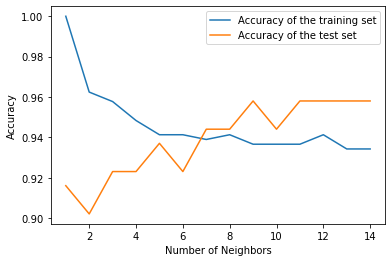

In [77]:
#----------KNN Classifier 

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#by looking at plot, best result accurs when n_neighbors is 6

In [78]:
print("Accuracy of the training set for 7NN: {:3f}".format(training_accuracy[6]))
print("Accuracy of the test set for 7NN: {:3f}".format(test_accuracy[6]))

Accuracy of the training set for 7NN: 0.938967
Accuracy of the test set for 7NN: 0.944056


### Logistic Regression

In [79]:
#----------------Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#It seems as it does better than KNN

Accuracy on the training set: 0.948
Accuracy on the training set: 0.951


C:\Users\Public\MyPrograms\Anaconda\envs\aix360\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision Tree

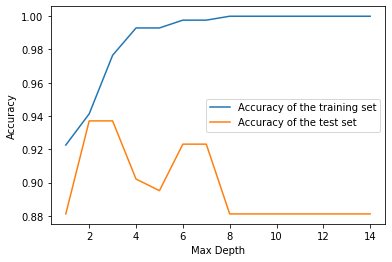

In [80]:
#----------------- Decision Tree

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

In [81]:
export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

In [82]:
print('Feature importances: {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances: [0.         0.0096886  0.         0.         0.         0.
 0.         0.71160121 0.         0.         0.01948008 0.
 0.         0.01676117 0.017502   0.         0.         0.
 0.         0.         0.         0.06706044 0.         0.11373562
 0.         0.03421113 0.00995974 0.         0.         0.        ]


numpy.ndarray

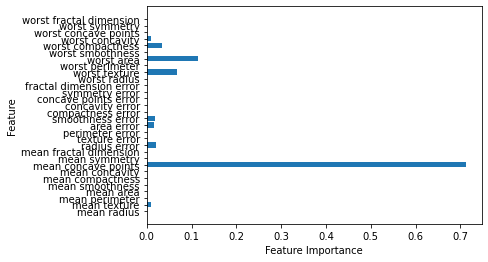

In [83]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [84]:
# Decision Tress perform well and we don't need to standardize features
# But as you see, it can easilly overfit 

### Random Forest

In [85]:
# ---------------- Random Forests

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature

RandomForestClassifier(random_state=0)

In [86]:
print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 1.000
acc for test data: 0.972


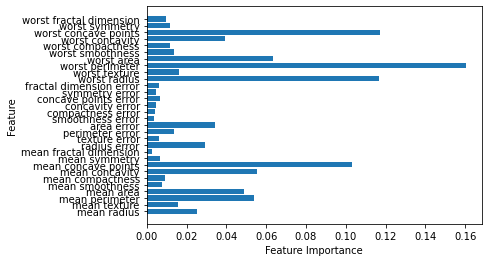

In [87]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [88]:
# Random Forest perform well and we don't need to standardize features
# Better than DT because of randomization
# It may not work well with sparse data

### Neural Network

In [89]:
# ------------- Neural Network

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.939
acc for test data: 0.916


In [90]:
print('The max per each feature:\n{}'.format(cancer.data.max(axis=0)))

The max per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [91]:
#let's improve on NN

In [92]:
#1- Scaling X data
scaler = StandardScaler()
X_train_NN = scaler.fit(X_train).transform(X_train)
X_test_NN = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_NN, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_NN, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_NN, y_test)))

acc for training data: 1.000
acc for test data: 0.958


In [93]:
mlp

MLPClassifier(max_iter=1000, random_state=42)

In [94]:
#2- change alpha
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_NN,y_train)
print('acc for training data: {:.3f}'.format(mlp.score(X_train_NN, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_NN, y_test)))

acc for training data: 0.986
acc for test data: 0.972


In [95]:
#we can play around with other hyper parameter to improve the performance

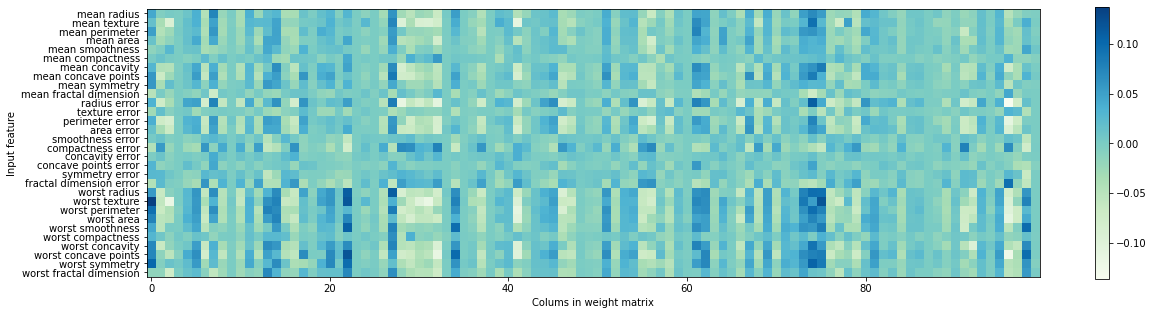

In [96]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Colums in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [97]:
# by looking at the heatmap it seems as from "smoothness error" till "fractal dimention error" does not play a huge role, 
# also "mean smoothness"

In [98]:
# NN can get better result in larger datasets
# we can tune a lot of parameter
# but data may need pre-processing

#other library for NN:
# theano
# keras
# tensorflow

### Support Vector Machine

In [99]:
# --------- SVM (Support Vector Machine)

svm = SVC(probability=True)
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))

acc on train dataset: 0.904
acc on test dataset: 0.937


In [100]:
#it mean we overfit into our train dataset
# we can change hyper parameter to improve the model
# one way it to apply scaling

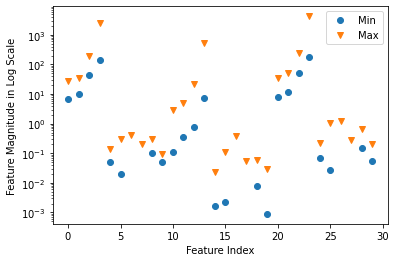

In [101]:
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [102]:
# We can see that there are huge diffrence between min and max and between diffrent features

In [103]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_SVM = (X_train - min_train)/range_train
X_test_SVM = (X_test - min_train)/range_train

print('Min per feature\n{}'.format(X_train_SVM.min(axis=0)))
print('Max per feature\n{}'.format(X_train_SVM.max(axis=0)))

Min per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Max per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [104]:
svm = SVC(probability=True)
svm.fit(X_train_SVM, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_SVM, y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_SVM, y_test)))

acc on train dataset: 0.984
acc on test dataset: 0.972


In [105]:
# we did much better now, but now we are underfitting
# to fix it we need change hyper parameters

In [106]:
svm = SVC(probability=True, C=1000)
svm.fit(X_train_SVM, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_SVM, y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_SVM, y_test)))

acc on train dataset: 1.000
acc on test dataset: 0.958


In [107]:
# For SVM:
# can work well on high dimensional data with smaller sample size
# but don't perform well on high dim with lots of sample (>100K)
# DT or RF can be better choice, because they require less/no preprocessing of data, easier to understand and visualize

![](cancerTree.dot)

# LIME

Code by Amine Ben Ayed & Philipp Scholl

In [108]:
# Importing LimeTextExplainer (aix360 sytle)
from aix360.algorithms.lime import LimeTabularExplainer

In [109]:
explainer_RF = LimeTabularExplainer(training_data=X_train, feature_names=cancer.feature_names,
                                   class_names=cancer.target_names, discretize_continuous=True)
explainer_NN = LimeTabularExplainer(training_data=X_train_NN, feature_names=cancer.feature_names,
                                   class_names=cancer.target_names, discretize_continuous=True)
explainer_SVM = LimeTabularExplainer(training_data=X_train_SVM, feature_names=cancer.feature_names,
                                   class_names=cancer.target_names, discretize_continuous=True)

In [110]:
i = 65

# Support Vector Machine
exp_SVM = explainer_SVM.explain_instance(X_test_SVM[i], svm.predict_proba, num_features=5)

# Random Forest
exp_RF = explainer_RF.explain_instance(X_test[i], forest.predict_proba, num_features=5)

# Neural Network
exp_NN = explainer_NN.explain_instance(X_test_NN[i], mlp.predict_proba, num_features=5)

In [111]:
exp_RF.show_in_notebook()

In [112]:
exp_RF.as_list()

[('84.37 < worst perimeter <= 97.59', 0.07027270139469564),
 ('area error > 44.87', -0.06085553650033187),
 ('worst concave points <= 0.07', 0.058304018727714534),
 ('13.06 < worst radius <= 14.96', 0.05467436832973925),
 ('worst concavity <= 0.12', 0.05370721355899183)]

In [113]:
exp_SVM.show_in_notebook()

In [114]:
exp_NN.show_in_notebook()

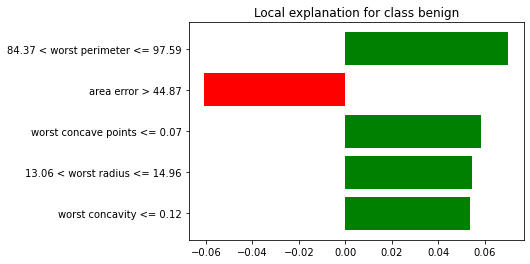

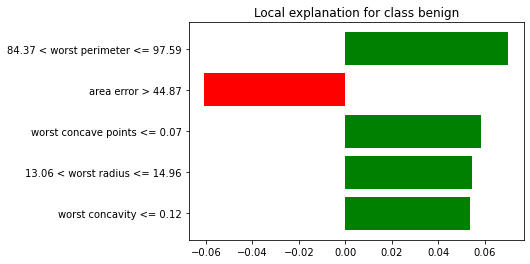

In [115]:
exp_RF.as_pyplot_figure()

In [116]:
exp_RF.as_map()

{1: [(22, 0.07027270139469564),
  (13, -0.06085553650033187),
  (27, 0.058304018727714534),
  (20, 0.05467436832973925),
  (26, 0.05370721355899183)]}

In [117]:
exp_RF.available_labels()

[1]

In [118]:
exp_RF.as_html()

'<html>\n        <meta http-equiv="content-type" content="text/html; charset=UTF8">\n        <head><script>var lime =\n/******/ (function(modules) { // webpackBootstrap\n/******/ \t// The module cache\n/******/ \tvar installedModules = {};\n/******/\n/******/ \t// The require function\n/******/ \tfunction __webpack_require__(moduleId) {\n/******/\n/******/ \t\t// Check if module is in cache\n/******/ \t\tif(installedModules[moduleId])\n/******/ \t\t\treturn installedModules[moduleId].exports;\n/******/\n/******/ \t\t// Create a new module (and put it into the cache)\n/******/ \t\tvar module = installedModules[moduleId] = {\n/******/ \t\t\texports: {},\n/******/ \t\t\tid: moduleId,\n/******/ \t\t\tloaded: false\n/******/ \t\t};\n/******/\n/******/ \t\t// Execute the module function\n/******/ \t\tmodules[moduleId].call(module.exports, module, module.exports, __webpack_require__);\n/******/\n/******/ \t\t// Flag the module as loaded\n/******/ \t\tmodule.loaded = true;\n/******/\n/******/ 

### Small implementation of a notebook widget function to display multiple instances for explanation

In [119]:
def my_function(x):
    exp_t = explainer_RF.explain_instance(X_test[x], forest.predict_proba, num_features=5)    
    exp_t.show_in_notebook(show_table=True)

In [120]:
my_list = [("Data row : "+str(i), i) for i in range(len(X_test))]

interact(my_function, x=my_list)

interactive(children=(Dropdown(description='x', options=(('Data row : 0', 0), ('Data row : 1', 1), ('Data row …

<function __main__.my_function(x)>